## Colab

In [5]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/sign-language-img.zip \
-o /tmp/sign-language-img.zip


## Local

In [ ]:
'''!python -m wget -o C:/Users/celio/OneDrive/Escritorio/programación/platzi/CursoProfesionaldeRedesNeuronalesconTensorFlow/archivos_clase/archivos https://storage.googleapis.com/platzi-tf2/sign-language-img.zip'''

/usr/bin/python3: No module named wget


## Colab

In [6]:
import os
import zipfile

local_zip = '/content/sign-language-img.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/sign-language-img')
zip_ref.close()
os.remove(local_zip)

## Local

In [ ]:
'''import os
import zipfile

local_zip = 'C:/Users/celio/OneDrive/Escritorio/programación/platzi/CursoProfesionaldeRedesNeuronalesconTensorFlow/archivos_clase/archivos/sign-language-img.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('C:/Users/celio/OneDrive/Escritorio/programación/platzi/CursoProfesionaldeRedesNeuronalesconTensorFlow/archivos_clase/archivos/sign-language-img')
zip_ref.close()
os.remove(local_zip)'''

"import os\nimport zipfile\n\nlocal_zip = 'C:/Users/celio/OneDrive/Escritorio/programación/platzi/CursoProfesionaldeRedesNeuronalesconTensorFlow/archivos_clase/archivos/sign-language-img.zip'\nzip_ref = zipfile.ZipFile(local_zip, 'r')\nzip_ref.extractall('C:/Users/celio/OneDrive/Escritorio/programación/platzi/CursoProfesionaldeRedesNeuronalesconTensorFlow/archivos_clase/archivos/sign-language-img')\nzip_ref.close()\nos.remove(local_zip)"

In [48]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Colab

In [8]:
train_dir = '/content/sign-language-img/Train'
test_dir = '/content/sign-language-img/Test'

## Local

In [ ]:
'''train_dir = 'la local'
test_dir = '/content/sign-language-img/Test''''

In [9]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

In [44]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size = 128,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training',
    )

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size = 128,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation',
    )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size = 128,
    class_mode='categorical',
    color_mode='grayscale',
    )


Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [45]:
classes =[char for char in string.ascii_uppercase if char !='J' if char !='Z']

In [46]:
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [49]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

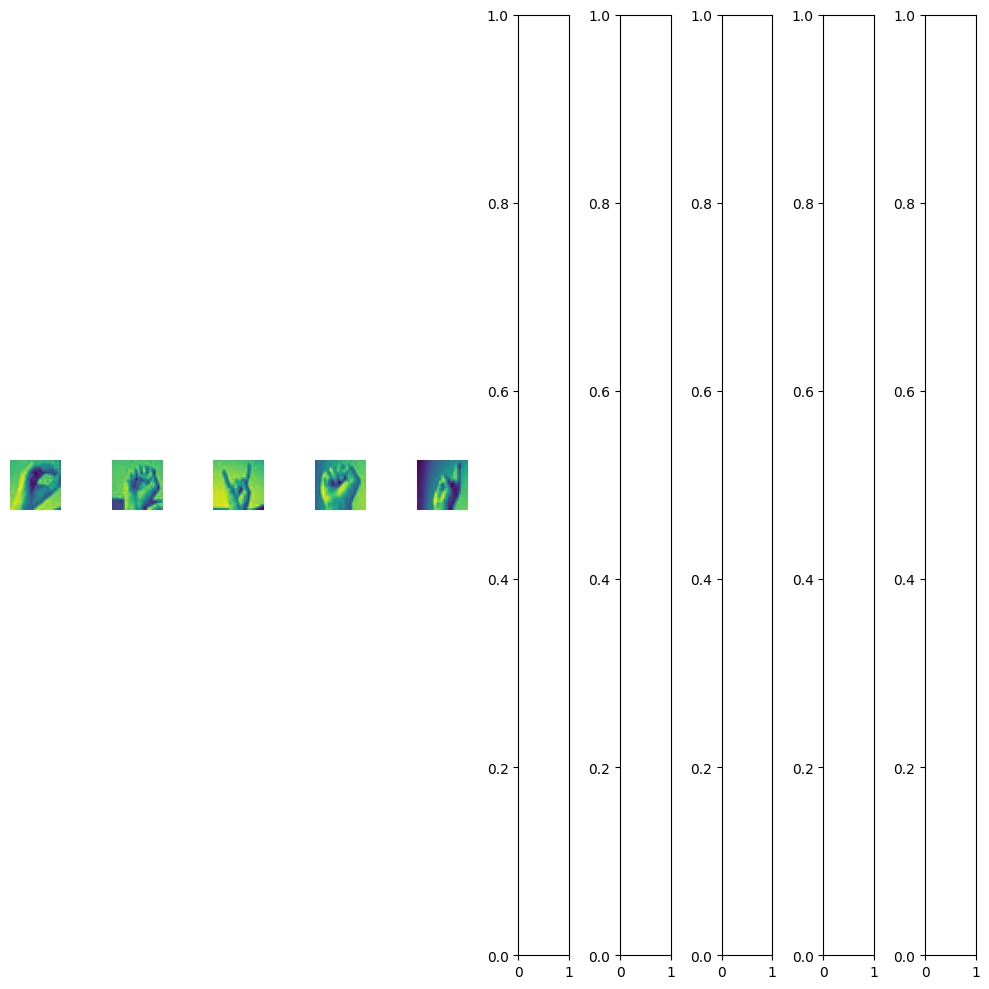

In [50]:
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:5])

In [28]:
model_base = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(256, activation = "relu"),
              tf.keras.layers.Dense(128, activation = "relu"),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model_base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236,952 (925.59 KB)

 Trainable params: 236,952 (925.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_base.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_base.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.2229 - loss: 2.6606 - val_accuracy: 0.4926 - val_loss: 1.7020
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.5774 - loss: 1.3850 - val_accuracy: 0.5930 - val_loss: 1.3523
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.7029 - loss: 0.9728 - val_accuracy: 0.6316 - val_loss: 1.1810
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.7756 - loss: 0.7488 - val_accuracy: 0.6372 - val_loss: 1.2298
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8183 - loss: 0.5988 - val_accuracy: 0.6912 - val_loss: 1.0649
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.8827 - loss: 0.4207 - val_accuracy: 0.6975 - val_loss: 0.9997
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9045 - loss: 0.3347 - val_accuracy: 0.7046 - val_loss: 1.0615
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9291 - loss: 0.2599 - val_accuracy: 0.

In [ ]:
results = model_base.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.7507 - loss: 1.2716


In [ ]:
def visualizacion_resultados(history):
    epochs = [i for i in range(20)]
    fig, ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    fig.set_size_inches(16, 9)

    ax[0].plot(epochs, train_acc, 'go-', label='Entrenamiento accuracy')
    ax[0].plot(epochs, val_acc, "ro-", label='Validacion accuracy')
    ax[0].set_title('Entrenamiento & validación accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs, train_loss, 'go-', label='Entrenamiento Loss')
    ax[1].plot(epochs, val_loss, "ro-", label='Validacion Loss')
    ax[1].set_title('Entrenamiento & validación Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")

    plt.show()


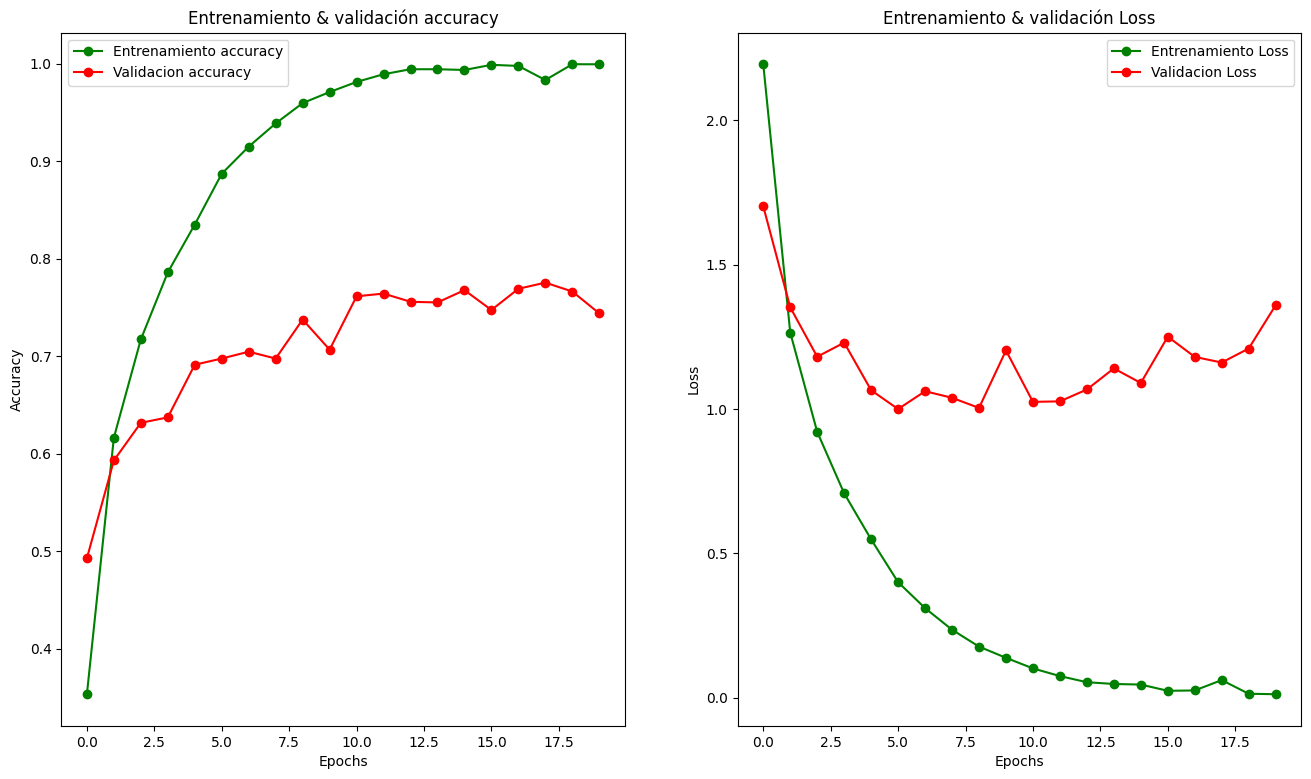

In [ ]:
visualizacion_resultados(history)

In [11]:
from tensorflow.keras import layers, models, regularizers

In [ ]:
model_optimizer = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_optimizer.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236,952 (925.59 KB)

 Trainable params: 236,952 (925.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_optimizer.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.1342 - loss: 2.9068 - val_accuracy: 0.4968 - val_loss: 1.7373
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.4438 - loss: 1.6959 - val_accuracy: 0.5930 - val_loss: 1.3837
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.5690 - loss: 1.2847 - val_accuracy: 0.6049 - val_loss: 1.2251
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.6480 - loss: 1.0487 - val_accuracy: 0.6554 - val_loss: 1.0971
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.6938 - loss: 0.8975 - val_accuracy: 0.7004 - val_loss: 0.9748
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.7423 - loss: 0.7625 - val_accuracy: 0.7389 - val_loss: 0.8573
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7809 - loss: 0.6513 - val_accuracy: 0.7095 - val_loss: 0.8981
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8021 - loss: 0.5820 - val

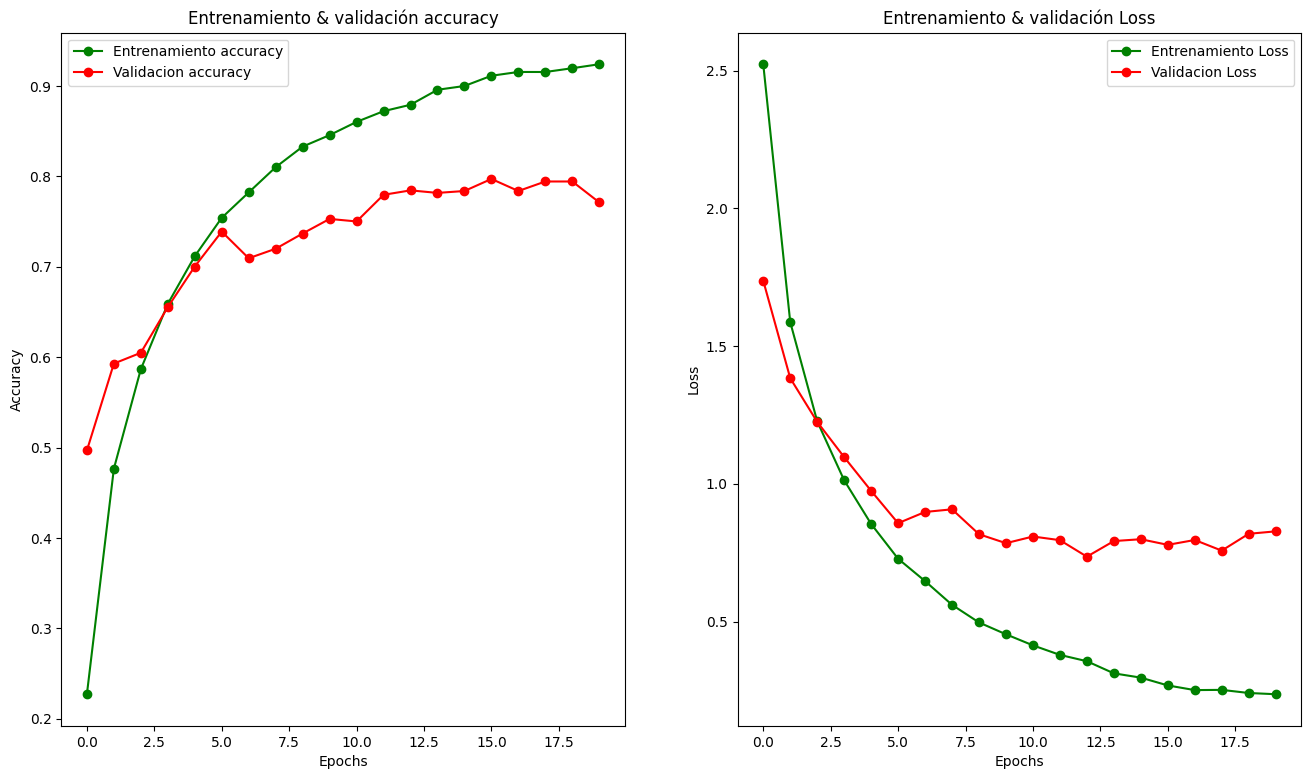

In [ ]:
visualizacion_resultados(history_optimizer)

In [ ]:
model_convolutional = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape = (28, 28, 1)),
              tf.keras.layers.MaxPool2D(2,2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_convolutional.summary()

model_convolutional.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_convolutional = model_convolutional.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12675)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       3,245,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,281,798 (12.52 MB)

 Trainable params: 3,281,798 (12.52 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.2390 - loss: 2.5751 - val_accuracy: 0.7305 - val_loss: 0.8692
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.8230 - loss: 0.5729 - val_accuracy: 0.8204 - val_loss: 0.5984
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9375 - loss: 0.2331 - val_accuracy: 0.8358 - val_loss: 0.6246
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9779 - loss: 0.1119 - val_accuracy: 0.8407 - val_loss: 0.6241
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9849 - loss: 0.0825 - val_accuracy: 0.8358 - val_loss: 0.6289
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9902 - loss: 0.0616 - val_accuracy: 0.8519 - val_loss: 0.6428
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9924 - loss: 0.0516 - val_accuracy: 0.8533 - val_loss: 0.7085
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9937 - loss: 0.0472 - val_a

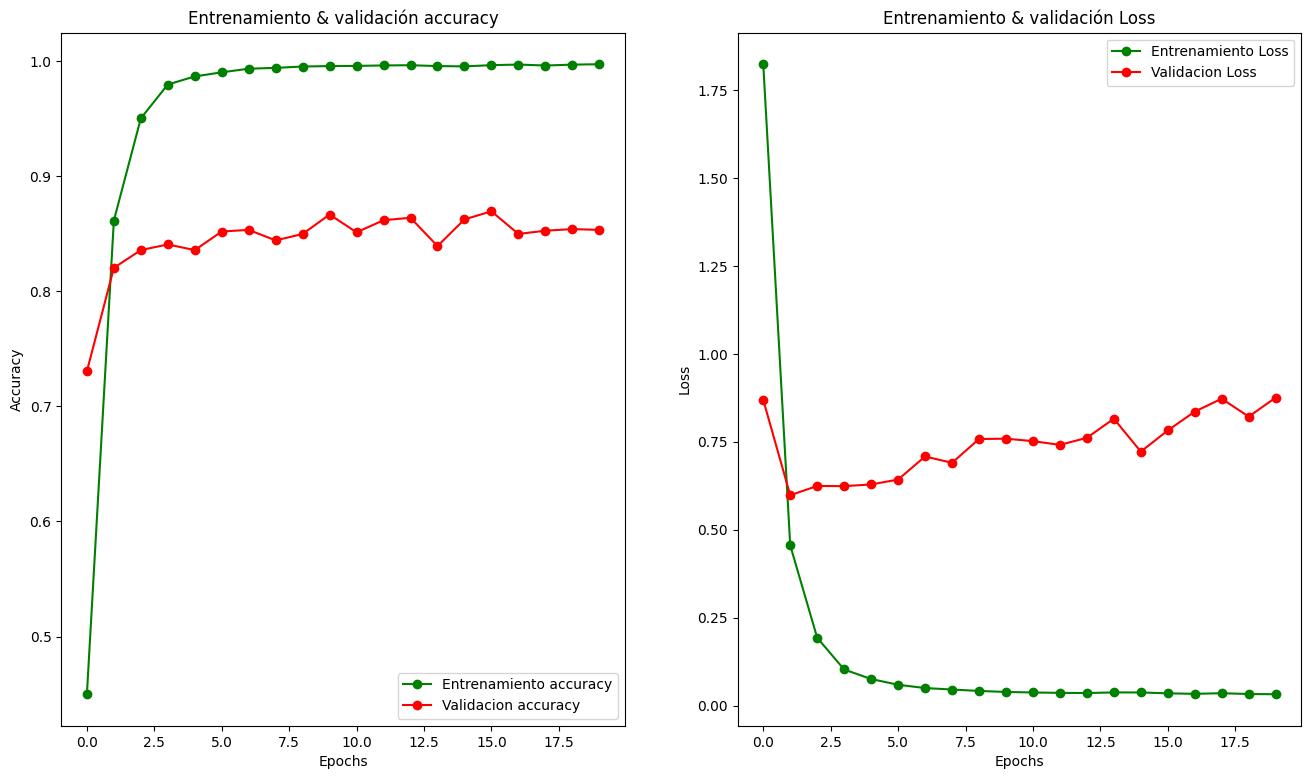

In [ ]:
visualizacion_resultados(history_convolutional)

## Callback

In [ ]:
model_callback = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape = (28, 28, 1)),
              tf.keras.layers.MaxPool2D(2,2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_callback.summary()

model_callback.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12675)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │       3,245,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,281,798 (12.52 MB)

 Trainable params: 3,281,798 (12.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import Callback

class TrainingCallBack(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy')>0.99:
      print("Lo logramos, nuestro modelo llego a 95%, detenemos el entrenamiento")
      self.model.stop_training = True


In [ ]:
callback = TrainingCallBack()

history_callback = model_callback.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback],
    validation_data = validation_generator,
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.2495 - loss: 2.5420 - val_accuracy: 0.7523 - val_loss: 0.8250
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.8345 - loss: 0.5371 - val_accuracy: 0.8126 - val_loss: 0.6081
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9497 - loss: 0.1978 - val_accuracy: 0.8140 - val_loss: 0.6391
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9785 - loss: 0.1046 - val_accuracy: 0.8414 - val_loss: 0.5969
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9869 - loss: 0.0732 - val_accuracy: 0.8379 - val_loss: 0.6109
Epoch 6/20
211/215 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9926 - loss: 0.0538Lo logramos, nuestro modelo llego a 95%, detenemos el entrenamiento
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9926 - loss: 0.0538 - val_accuracy: 0.8421 - val_loss: 0.6227


In [ ]:
def get_model():
  model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape = (28, 28, 1)),
              tf.keras.layers.MaxPool2D(2,2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])
  return model

model_early = get_model()

model_early.summary()

model_early.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 12675)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │       3,245,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,281,798 (12.52 MB)

 Trainable params: 3,281,798 (12.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 3, mode = 'auto')

In [ ]:
history_early = model_early.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback_early],
    validation_data = validation_generator,
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.2651 - loss: 2.4973 - val_accuracy: 0.7446 - val_loss: 0.8100
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.8473 - loss: 0.5059 - val_accuracy: 0.8077 - val_loss: 0.6294
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9577 - loss: 0.1787 - val_accuracy: 0.8407 - val_loss: 0.6160
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9804 - loss: 0.0967 - val_accuracy: 0.8428 - val_loss: 0.6813
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.9885 - loss: 0.0669 - val_accuracy: 0.8407 - val_loss: 0.6507
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.9914 - loss: 0.0561 - val_accuracy: 0.8512 - val_loss: 0.6360


In [12]:
!pip install -q -U keras-tuner
import kerastuner as kt
from tensorflow import keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00


<ipython-input-12-0703c731f7cf>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
def constructor_model(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape = (28, 28, 1)))
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.Flatten())

  hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
  model.add(tf.keras.layers.Dense(units = hp_units, activation = "relu", kernel_regularizer=regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(128, activation = "relu", kernel_regularizer=regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(len(classes), activation = "softmax"))

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = hp_learning_rate), loss = "categorical_crossentropy", metrics = ["accuracy"])

  return model

## Keras Tuner

In [ ]:
tuner = kt.Hyperband(
  constructor_model,
  objective = "val_accuracy",
  max_epochs = 20,
  factor = 3,
  directory = 'models/',
  project_name = 'Platzi-tuner')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner.search(train_generator, epochs = 20, validation_data = validation_generator)

best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

Trial 30 Complete [00h 03m 06s]
val_accuracy: 0.8477193117141724

Best val_accuracy So Far: 0.8715789318084717
Total elapsed time: 00h 38m 06s


In [ ]:
print(best_hps.get('units'))


512


In [ ]:
print(best_hps.get('learning_rate'))

0.001


In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

history_tuner = hypermodel.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback_early],
    validation_data = validation_generator)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.3133 - loss: 2.3513 - val_accuracy: 0.7789 - val_loss: 0.6954
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.9147 - loss: 0.3196 - val_accuracy: 0.8386 - val_loss: 0.5961
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9820 - loss: 0.1060 - val_accuracy: 0.8632 - val_loss: 0.5660
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9935 - loss: 0.0619 - val_accuracy: 0.8646 - val_loss: 0.5843
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9971 - loss: 0.0475 - val_accuracy: 0.8639 - val_loss: 0.5906
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.9981 - loss: 0.0413 - val_accuracy: 0.8519 - val_loss: 0.5825


In [ ]:
config_dic = hypermodel.get_config()

In [ ]:
print(config_dic)

{'name': 'sequential_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 28, 28, 1), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_1'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 75, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registere

In [ ]:
model_some_config = tf.keras.Sequential.from_config(config_dic)

In [ ]:
model_some_config.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12675)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       6,490,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,559,622 (25.02 MB)

 Trainable params: 6,559,622 (25.02 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model_weight = get_model()
model_weight.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12675)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       3,245,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,281,798 (12.52 MB)

 Trainable params: 3,281,798 (12.52 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model_weight.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"])

In [67]:
checkpoint_path = "model_checkpoints/checkpoint.weights.h5"  # Corrige el nombre de la carpeta y añade la extensión
checkpoint_weights = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=True,
    verbose=1
)

In [68]:
history_weight = model_weight.fit(
    train_generator,
    epochs = 20,
    callbacks = [checkpoint_weights],
    validation_data = validation_generator
)

Epoch 1/20
211/215 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9975 - loss: 0.0277
Epoch 1: saving model to model_checkpoints/checkpoint.weights.h5
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9975 - loss: 0.0278 - val_accuracy: 0.8709 - val_loss: 0.9164
Epoch 2/20
208/215 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9987 - loss: 0.0243
Epoch 2: saving model to model_checkpoints/checkpoint.weights.h5
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.9987 - loss: 0.0244 - val_accuracy: 0.8674 - val_loss: 0.9153
Epoch 3/20
209/215 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9988 - loss: 0.0232
Epoch 3: saving model to model_checkpoints/checkpoint.weights.h5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9988 - loss: 0.0233 - val_accuracy: 0.8533 - val_loss: 0.9861
Epoch 4/20
212/215 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9987 - loss: 0.0236
Epoch 4: saving model to model_checkpoints/checkpoint.weights.h5
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms

In [14]:
import os

# Verificar y crear el directorio si no existe
os.makedirs("model_manul", exist_ok=True)

# Guardar los pesos del modelo
model_weight.save_weights("model_manul/my_model.weights.h5")

NameError: name 'model_weight' is not defined

In [77]:
model_weight2 = get_model()
model_weight2.compile(
    optimizer= "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
model_weight2.load_weights(checkpoint_path)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [79]:
model_weight2.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8806 - loss: 0.8874


[0.8725690245628357, 0.8813441395759583]

In [80]:
model_weight.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8824 - loss: 0.8802


[0.8725689649581909, 0.8813441395759583]

In [86]:
checkpoint_path = "model_checkpoints_complete/checkpoint.keras"  # Corrige el nombre de la carpeta y añade la extensión
checkpoint_weights = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    monitor = "val_accuracy",
    save_best_only = True,
    verbose=1
)

In [87]:
model_complete = get_model()

model_complete.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"])

history_complete = model_complete.fit(
    train_generator,
    epochs = 20,
    callbacks = [checkpoint_weights],
    validation_data = validation_generator
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


208/215 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2490 - loss: 2.5425
Epoch 1: val_accuracy improved from -inf to 0.72632, saving model to /content/model_checkpoints_complete/checkpoint.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.2574 - loss: 2.5132 - val_accuracy: 0.7263 - val_loss: 0.7982
Epoch 2/20
210/215 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8459 - loss: 0.5067
Epoch 2: val_accuracy improved from 0.72632 to 0.82526, saving model to /content/model_checkpoints_complete/checkpoint.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.8469 - loss: 0.5036 - val_accuracy: 0.8253 - val_loss: 0.5868
Epoch 3/20
208/215 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9544 - loss: 0.1856
Epoch 3: val_accuracy improved from 0.82526 to 0.84842, saving model to /content/model_checkpoints_complete/checkpoint.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.9547 - loss: 0.1847 - val_accuracy: 0.8484 - val_loss: 0.5648
Epoch 4/20
211/215 ━━━━

In [95]:
model_complete.save('saved_model_complete/mymodel.keras')

In [97]:
model_complete3 = tf.keras.models.load_model('saved_model_complete/mymodel.keras')

In [98]:
model_complete3.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8708 - loss: 0.7071


[0.6632483005523682, 0.8747908473014832]

In [99]:
model_complete.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8743 - loss: 0.6768


[0.6632483601570129, 0.8747908473014832]

In [100]:
!pip install pyyaml h5py

In [101]:
model_complete3.save('my_model.h5')

In [103]:
model_complete4 = tf.keras.models.load_model('my_model.h5')

## Carga de sistemas pre-entrenados en Keras

In [14]:
!pip install tensorflow


In [15]:
train_generator_resize = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size = 128,
    class_mode='categorical',
    color_mode='rgb',
    subset='training',
    )

validation_generator_resize = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size = 128,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation',
    )

test_generator_resize = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size = 128,
    class_mode='categorical',
    color_mode='rgb',
    )

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [16]:
from tensorflow.keras.applications import InceptionV3

pre_trained_model = InceptionV3(
    include_top = False,
    input_tensor = tf.keras.layers.Input(shape = (150, 150, 3)),
)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 74, 74, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 74, 74, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 74, 74, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 72, 72, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 72, 72, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 72, 72, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 72, 72, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 72, 72, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 72, 72, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 35, 35, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 35, 35, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 35, 35, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 33, 33, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 33, 33, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [17]:
last_layers = pre_trained_model.get_layer('mixed7')
last_output = last_layers.output

In [18]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(128, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(classes), activation = "softmax")(x)

model_keras = tf.keras.Model(pre_trained_model.input, x)

model_keras.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"])

model_keras.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 74, 74, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 74, 74, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 74, 74, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 72, 72, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 72, 72, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 72, 72, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 72, 72, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 72, 72, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 72, 72, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 35, 35, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 35, 35, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 35, 35, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 33, 33, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 33, 33, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 13,795,384 (52.63 MB)

 Trainable params: 4,820,120 (18.39 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [19]:
history_keras = model_keras.fit(
    train_generator_resize,
    epochs = 5,
    validation_data = validation_generator_resize
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 1370s 6s/step - accuracy: 0.8566 - loss: 0.5185 - val_accuracy: 0.9839 - val_loss: 0.0529
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1358s 6s/step - accuracy: 0.9994 - loss: 0.0050 - val_accuracy: 0.9881 - val_loss: 0.0411
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1285s 6s/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 0.9888 - val_loss: 0.0290
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1299s 6s/step - accuracy: 0.9999 - loss: 0.0013 - val_accuracy: 0.9874 - val_loss: 0.0417
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1265s 6s/step - accuracy: 1.0000 - loss: 5.7836e-04 - val_accuracy: 0.9888 - val_loss: 0.0323


In [20]:
results = model_keras.evaluate(test_generator_resize)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 310s 5s/step - accuracy: 0.9891 - loss: 0.0379


## Uso sistemas pre-entrenados de TensorFlow Hub

In [32]:
!pip install --upgrade tensorflow tensorflow-hub



  Using cached tensorflow-2.18.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)


In [33]:
import tensorflow_hub as hub

In [37]:
import tensorflow as tf
import tensorflow_hub as hub

print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)


TensorFlow version: 2.17.0
TensorFlow Hub version: 0.16.1


In [51]:
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"

model_hub = tf.keras.Sequential([
                                 tf.keras.layers.InputLayer(input_shape=(150, 150, 3)),
                                 hub.KerasLayer(module_url, trainable=False),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128, activation ="relu"),
                                 tf.keras.layers.Dropout(rate=0.2),
                                 tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_hub.build((None, 150, 150, 3))
model_hub.summary()


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7c5e351db940> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [ ]:
model_hub.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"])

history_hub = model_hub.fit(
    train_generator_resize,
    epochs = 5,
    validation_data = validation_generator_resize
)

In [ ]:
results = model_hub.evaluate(test_generator_resize)

In [ ]:
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

In [ ]:
model_tensorboard = get_model()

model_tensorboard.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"])



In [ ]:
callback_tensorboard = TensorBoard(log_dir = "logs/{}".format(time()))

In [ ]:
history_tensorboard = model_tensorboard.fit(
    train_generator,
    epochs = 20,
    callbacks = [callback_tensorboard],
    validation_data = validation_generator
)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
!tensorboard dev upload --logdir ./logs --name "Proyecto de lenguaje de señas" --description "Estos son los resultados del entrenamiento" --one_shot